In [3]:
import os
import csv
import pandas as pd
import numpy as np
from numpy import fft
from scipy.fftpack import fft
from scipy.fft import fft, fftfreq
# import scipy.integrate as spi
import matplotlib
from  matplotlib import pyplot as plt
# import librosa
from ipywidgets import interact, fixed, FloatSlider
import IPython.display as ipd

from sklearn import preprocessing
from BaselineRemoval import BaselineRemoval
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy import signal
import time
%matplotlib inline


/Users/kaichengliu/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
def is_float(element):
    try:
        float(element)
        return True
    except ValueError:
        return False

In [12]:
    data_arr = []
    data_arrx = []
    data_arry = []
    data_arrxt = []

In [19]:
with open('1012_kc_nano2_result_7.csv','rt') as csvfile:
    rows = csv.reader(csvfile)
    df=pd.read_csv(r'./1012_kc_nano2_result_7.csv', on_bad_lines='skip')
    for row in rows:
        data_arr.append(row)
    for i in range(0,len(df)+1):
#         print(len(data_arr[i]))
#         print(data_arr[i][0])
#         data_arrx.append(float(data_arr[i][0])-float(data_arr[1][0]))
#         data_arrx.append(float(data_arr[i][0]))
#         data_arry.append(float(data_arr[i][2]))
        data_arry.append(float(data_arr[i+1800000][2]))
#         if len(data_arr[i])>2:
#             if is_float(data_arr[i+300000][2]):
# #                 print(float(data_arr[i][2]))
#                 if float(data_arr[i+300000][2])>-1.5 and float(data_arr[i+300000][2])<0:
#                     data_arry.append(float(data_arr[i+300000][2]))
#         data_arrxt.append(float(data_arr[i][0])-float(data_arr[1][0]))
#     data_arry = preprocessing.scale(data_aΩrry)
#     for i in range(1, len(df)-1):
#         data_arrx[i] = (data_arrx[i+1]-data_arrx[i])
#         print(data_arrx[i])
#         if i == 1:
#             data_arry[1] = data_arry[1]*data_arrx[1]
#             print (data_arry[i])
#         else :
#             data_arry[i] = data_arry[i-1] + data_arry[i]*data_arrx[i]
#             print (data_arry[i])
    print(len(data_arry))

2100000


In [20]:
# fig = plt.figure()
# ax = plt.axes()

x1 = np.array([])
y1 = np.array([])
for i in range (0, int((len(data_arry)))):
    seconds = time.time()
    local_time = time.ctime(seconds)
    y1 = np.append(y1, data_arry[i])
    x1 = np.append(x1, i+1)
    if i%100000 == 0 and i!=0:
        print("Finished: ",(i/len(data_arry))*100,"%","Local time:", local_time)
# print (len(y_mean))
        
# print (y[0:5])
# print (np.percentile(y[0:5], 50))
# print (sum(y[0:5])/5)
# print (np.mean(y[0:5]))
# print (np.std(y[0:5]))
# y = preprocessing.scale(y)
print(len(x1))
print(len(y1))
# print (np.percentile(y[0:5], 50))
# plt.xticks(np.arange(0, len(x1)+1, 50000))
# ax.plot(x1,y1,color = 'k', linewidth=0.1)


Finished:  4.761904761904762 % Local time: Mon Oct 17 14:21:32 2022
Finished:  9.523809523809524 % Local time: Mon Oct 17 14:21:45 2022
Finished:  14.285714285714285 % Local time: Mon Oct 17 14:22:36 2022
Finished:  19.047619047619047 % Local time: Mon Oct 17 14:24:09 2022
Finished:  23.809523809523807 % Local time: Mon Oct 17 14:26:30 2022
Finished:  28.57142857142857 % Local time: Mon Oct 17 14:29:33 2022
Finished:  33.33333333333333 % Local time: Mon Oct 17 14:32:44 2022
Finished:  38.095238095238095 % Local time: Mon Oct 17 14:37:17 2022
Finished:  42.857142857142854 % Local time: Mon Oct 17 14:42:24 2022
Finished:  47.61904761904761 % Local time: Mon Oct 17 14:48:00 2022
Finished:  52.38095238095239 % Local time: Mon Oct 17 14:54:16 2022
Finished:  57.14285714285714 % Local time: Mon Oct 17 15:01:18 2022
Finished:  61.904761904761905 % Local time: Mon Oct 17 15:13:25 2022
Finished:  66.66666666666666 % Local time: Mon Oct 17 15:19:43 2022
Finished:  71.42857142857143 % Local time:

[1.000000e+00 2.000000e+00 3.000000e+00 ... 2.099998e+06 2.099999e+06
 2.100000e+06]
[-0.938 -0.938 -0.938 ... -0.94  -0.941 -0.935]


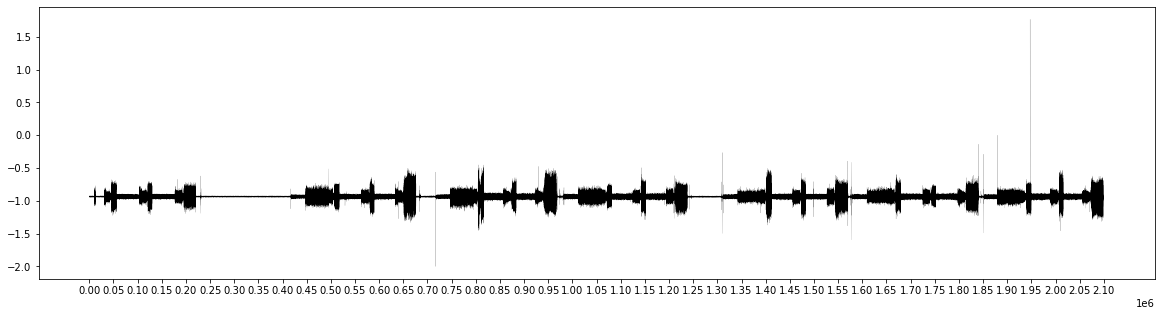

In [21]:
print(x1)
print(y1)
x1 = np.arange(1,len(y1)+1,1)
plt.figure(figsize = (20,5))
plt.xticks(np.arange(0,len(x1)+1,50000))
plt.plot(x1,y1,color = 'k', linewidth=0.1)
plt.show()

225000
225000


Text(0.5, 1.0, '0925-2_nano2_result_9: window 125')

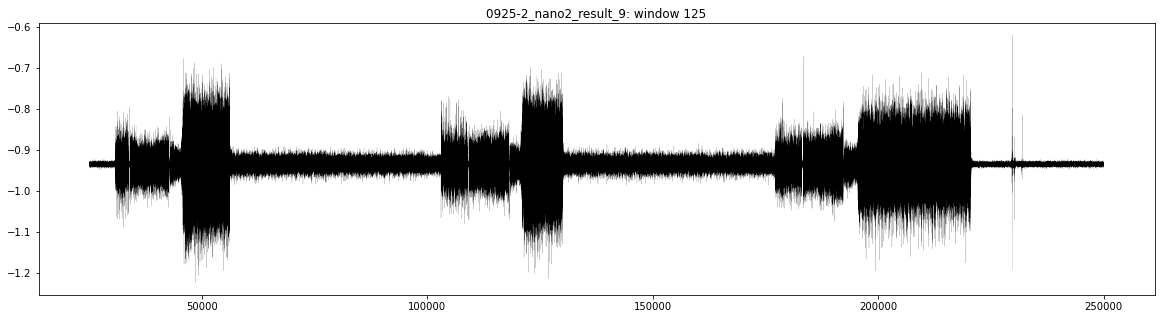

In [22]:
#切一次洗衣過程的
# fig = plt.figure()
# ax = plt.axes()
x = np.array([])
y = np.array([])
# 75000、170000可以自己調
for i in range (25000,250000):
    x = np.append(x, x1[i])
    y = np.append(y,y1[i])

# y = preprocessing.scale(y)
print(len(x))
print(len(y))
plt.figure(figsize = (20,5))
# plt.xticks(np.arange(0, len(x)+1, 5000))
plt.plot(x,y,color = 'k', linewidth=0.1)
plt.title("0925-2_nano2_result_9: window 125")

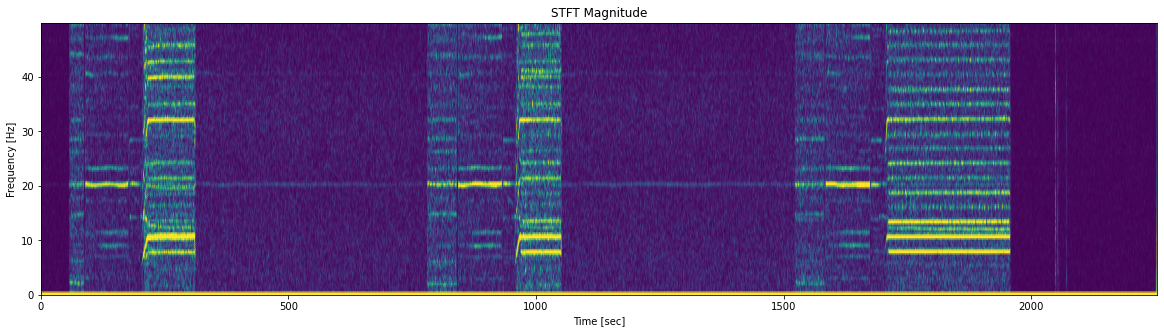

In [23]:
fs = 2100000/(float(data_arr[2100000-1][0])-float(data_arr[0][0]))
plt.figure(figsize = (20,5))
amp = 20
# print((y))
f, t, Zxx = signal.stft(y*2000, fs, nperseg=256)
# print(f)
# print(t)
# print(Zxx)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

0.010017915238095238
-0.9347733333333333
jhi
jhi
jhi
jhi
jhi
jhi
jhi
jhi
jhi
jhi
jhi
jhi
jhi
jhi
jhi
jhi
jhi
jhi
jhi
jhi
jhi
jhi
224
[20.25462245253246, 20.218323845986703, 20.345368968896853, 20.36351827216973, 20.299995710714658, 20.535936653262077, 20.345368968896853, 2.1416177861996686, 20.38166757544261, 20.309070362351097, 20.209249194350264, 20.227398497623142, 20.318145013987536, 20.399816878715487, 20.38166757544261, 20.263697104168898, 20.227398497623142, 20.299995710714658, 20.481488743443443, 20.39074222707905, 14.328874933937614, 10.617342414633951, 10.699014279361904, 10.717163582634782, 10.73531288590766, 10.744387537544101, 10.744387537544101, 10.73531288590766, 10.73531288590766, 10.73531288590766, 10.744387537544101, 20.399816878715487, 20.454264788534125, 20.408891530351926, 20.354443620533292, 20.227398497623142, 20.209249194350264, 20.263697104168898, 20.290921059078215, 20.445190136897686, 20.38166757544261, 20.25462245253246, 20.24554780089602, 20.327219665623975

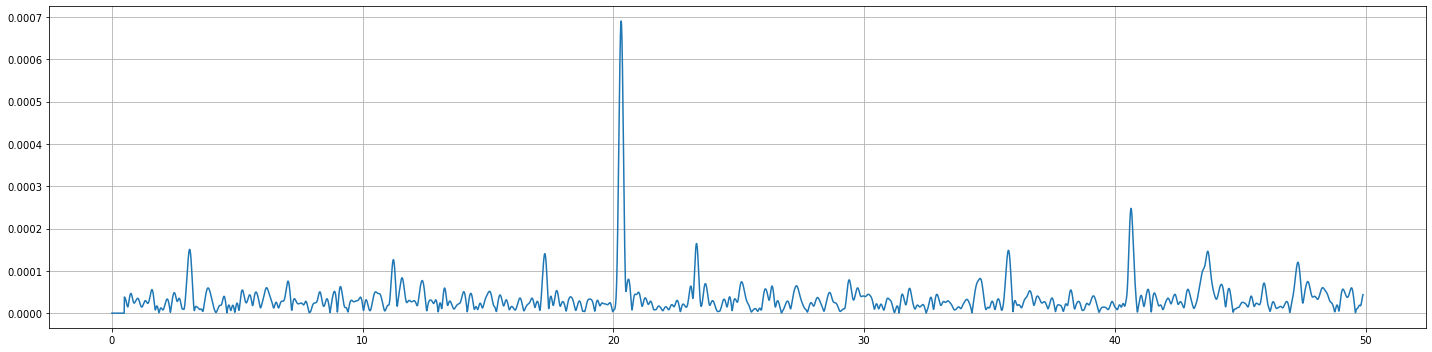

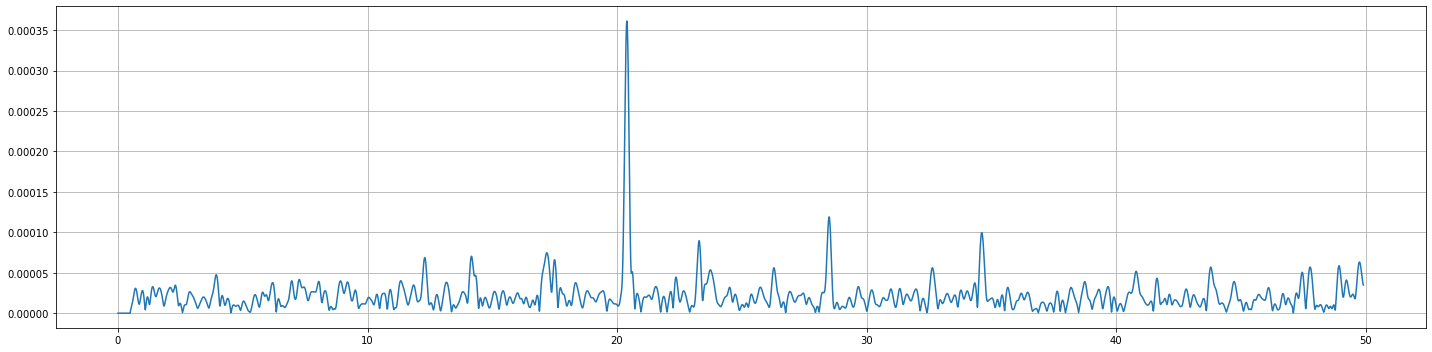

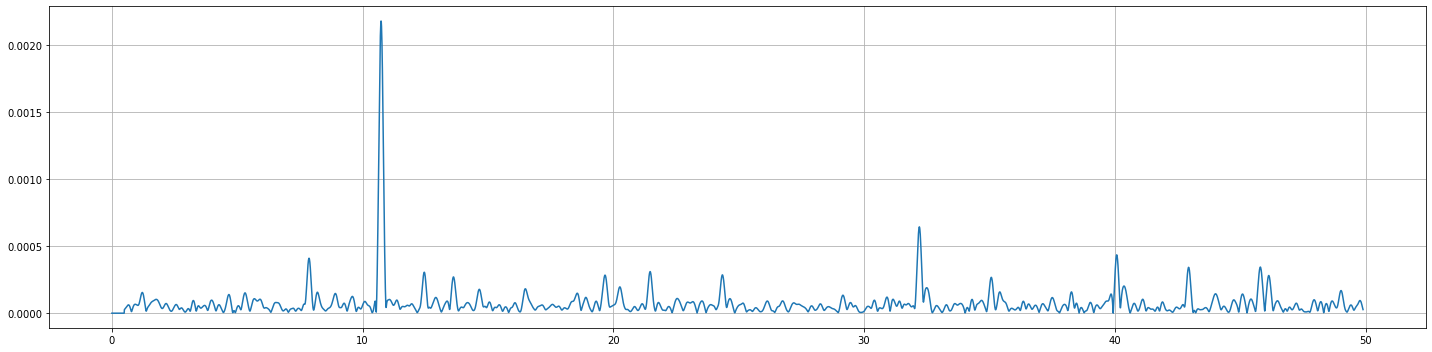

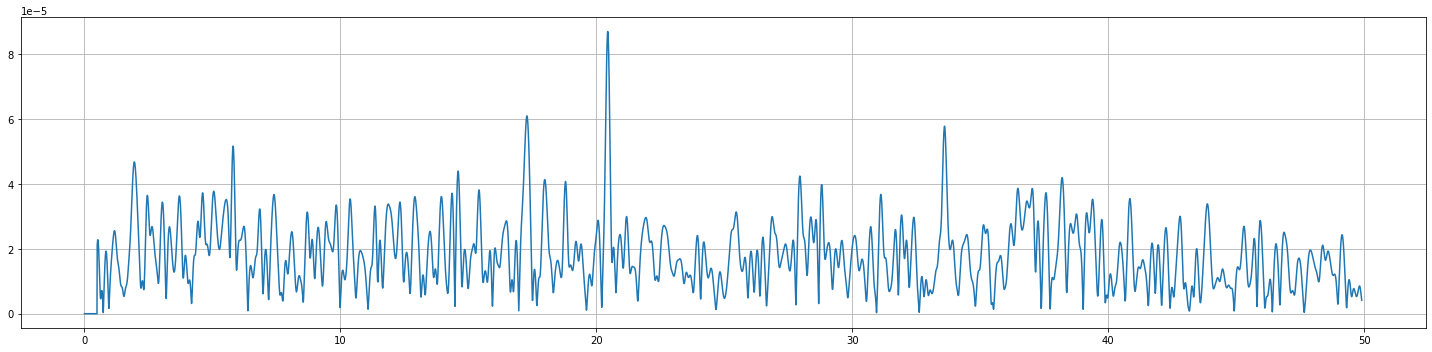

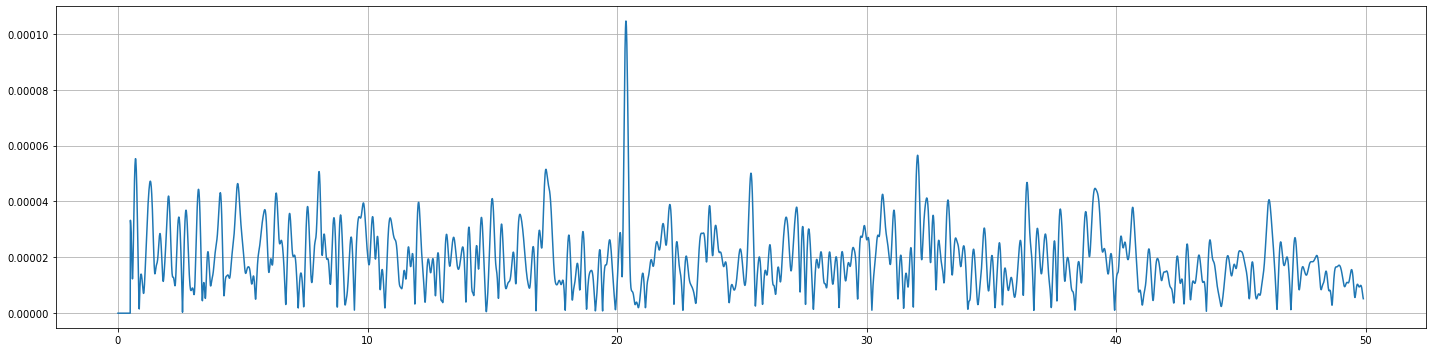

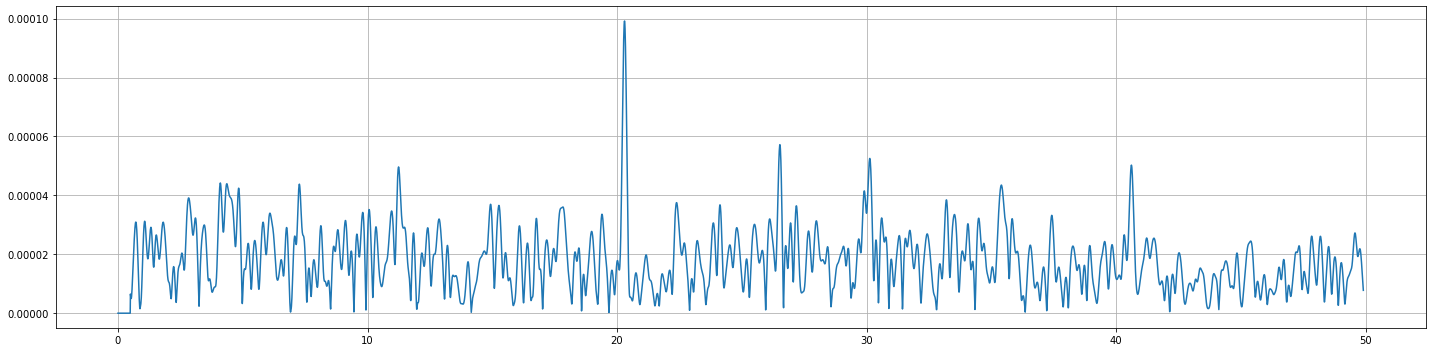

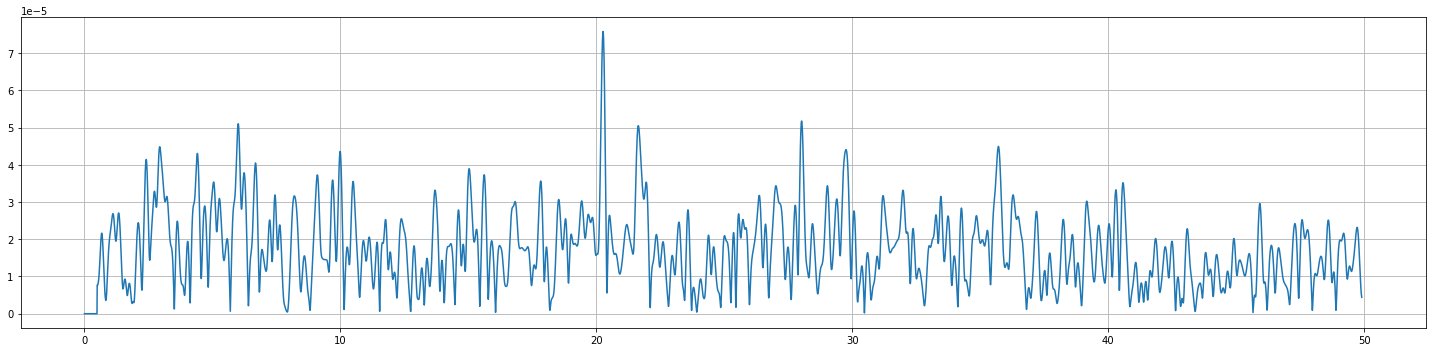

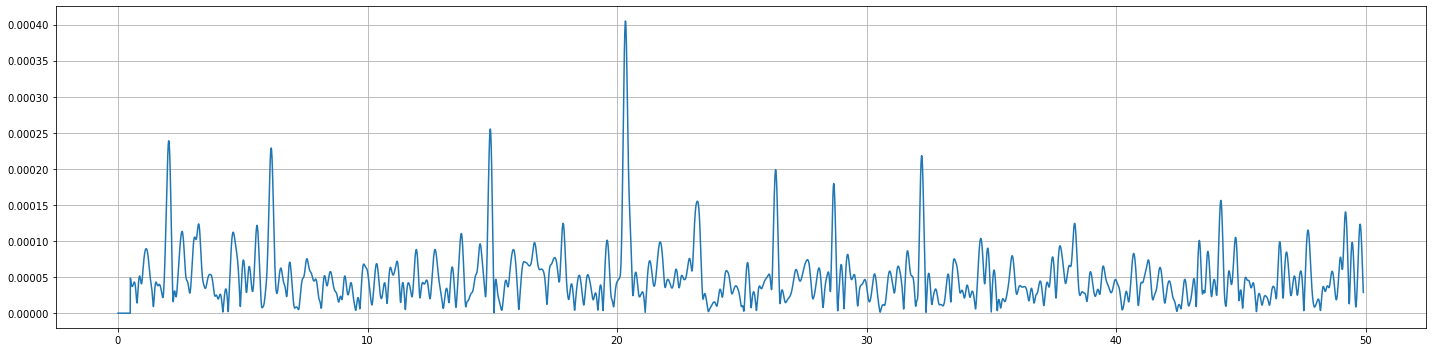

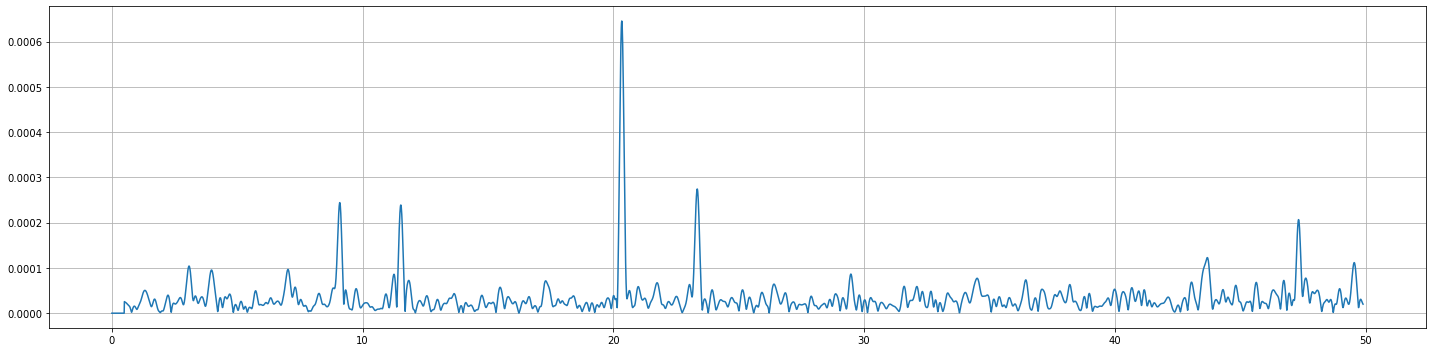

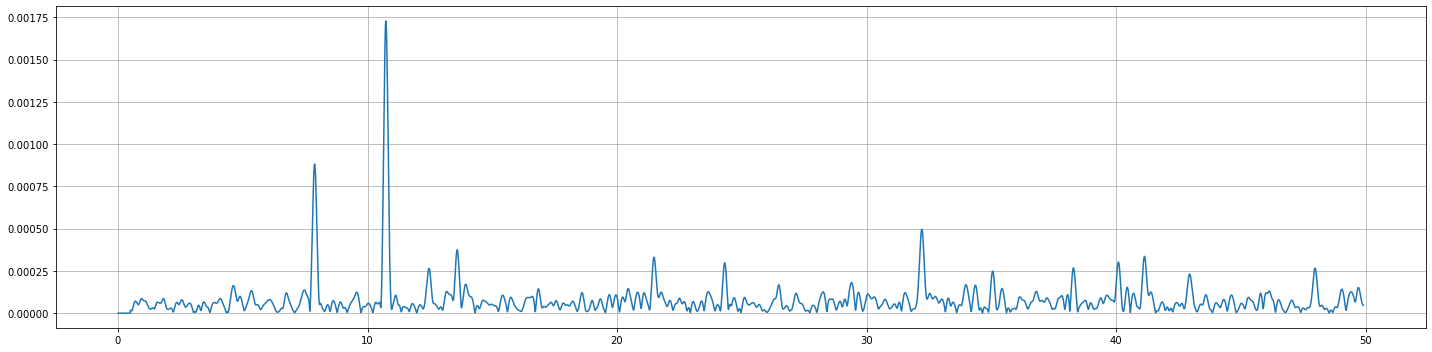

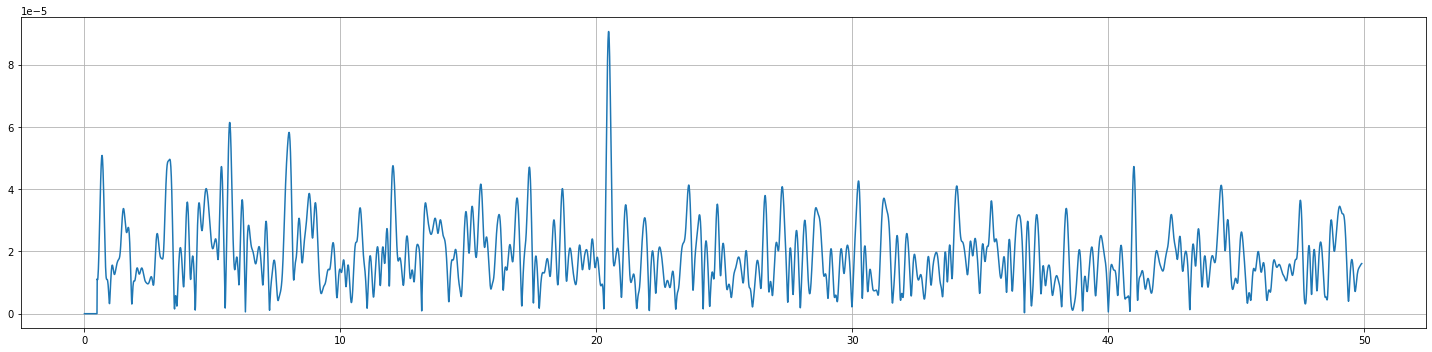

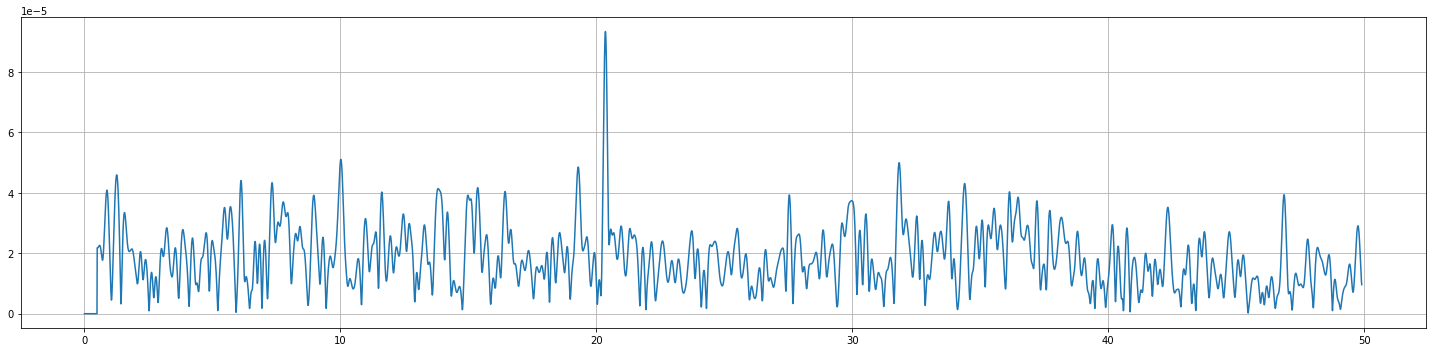

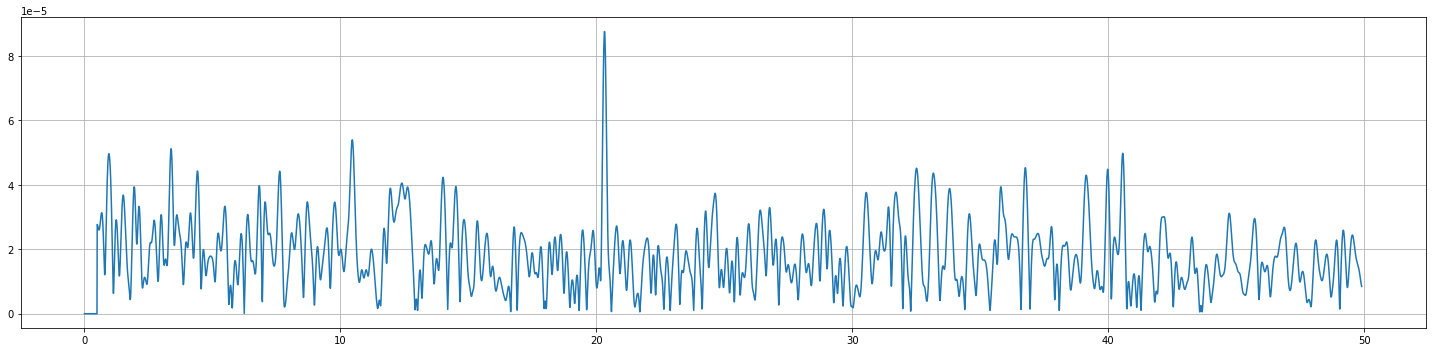

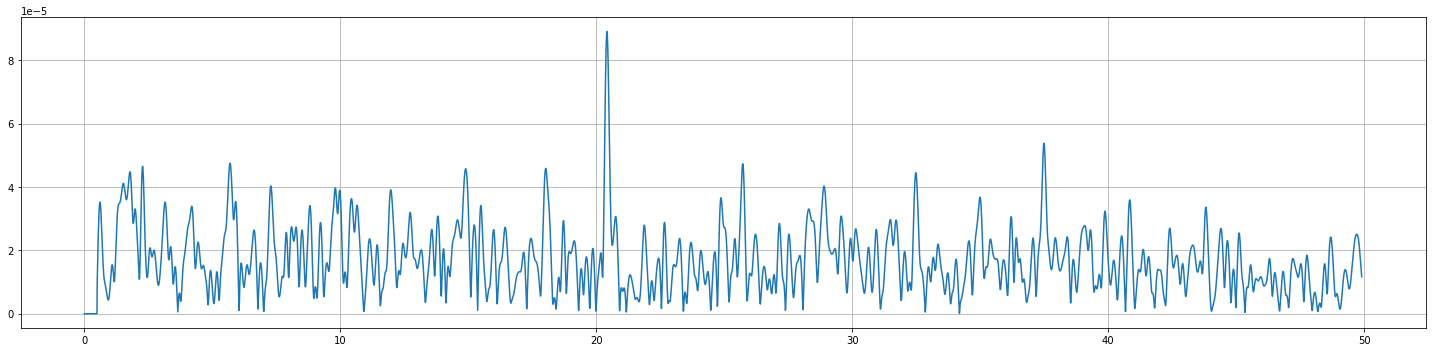

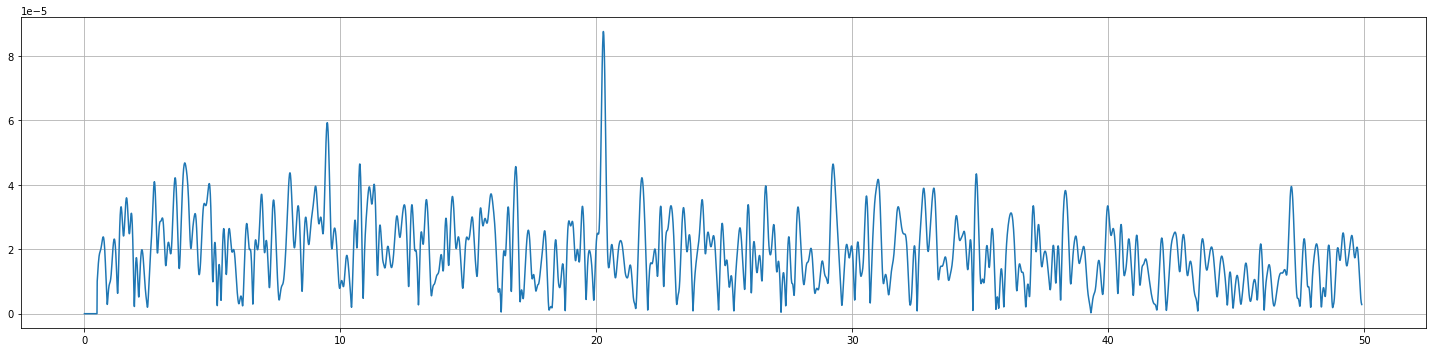

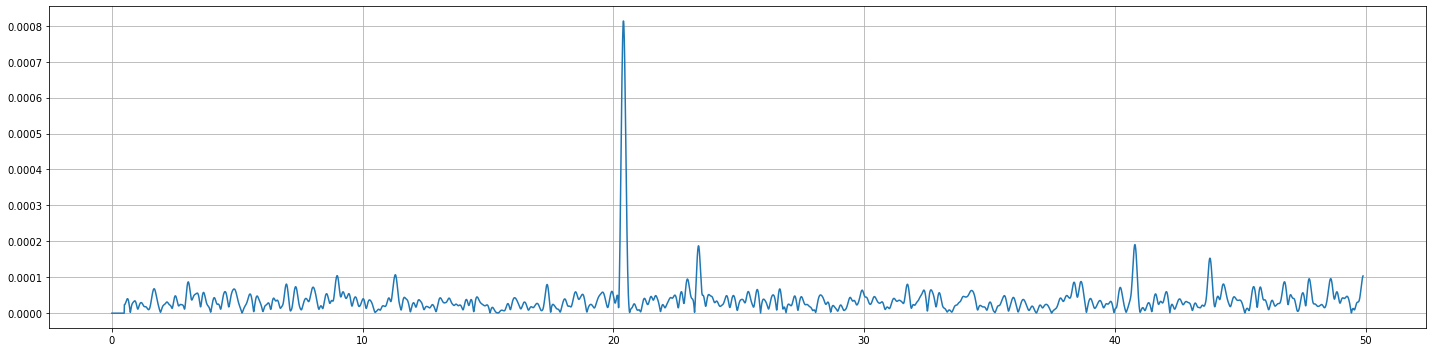

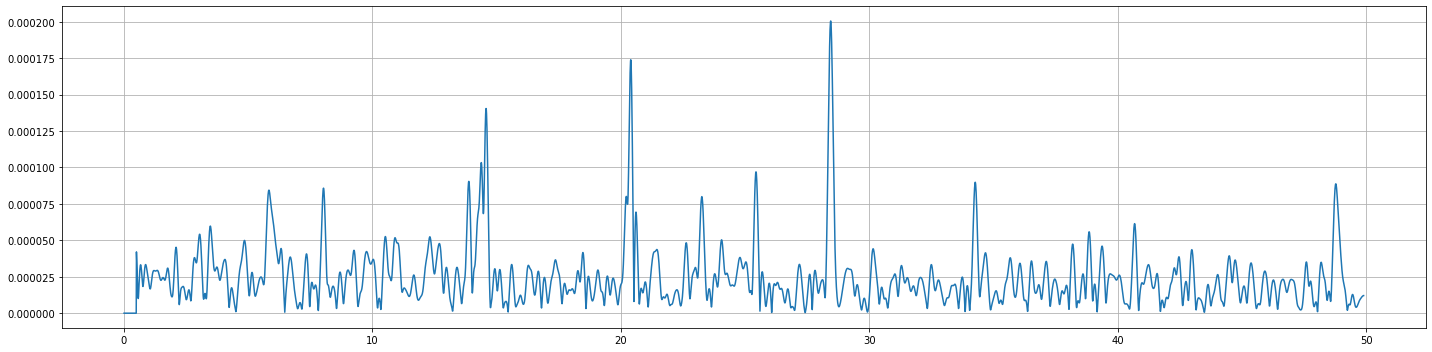

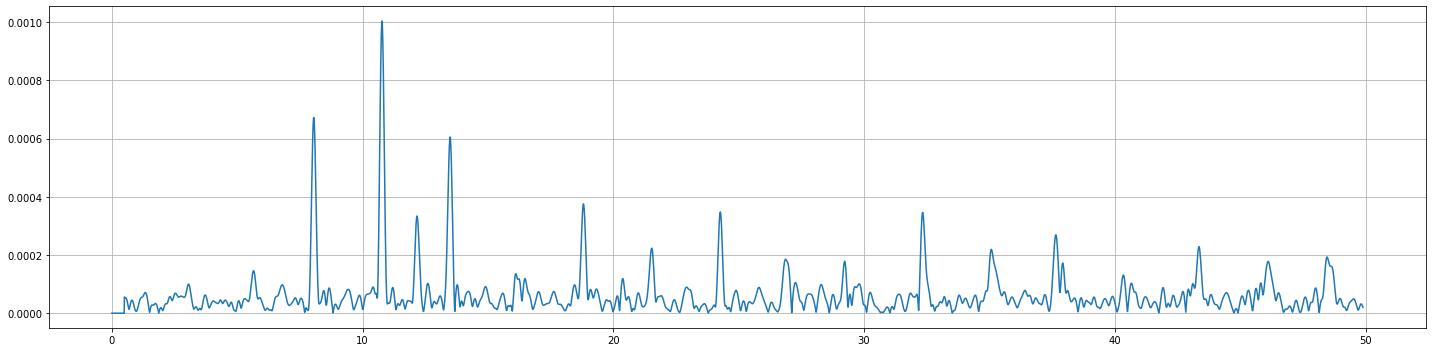

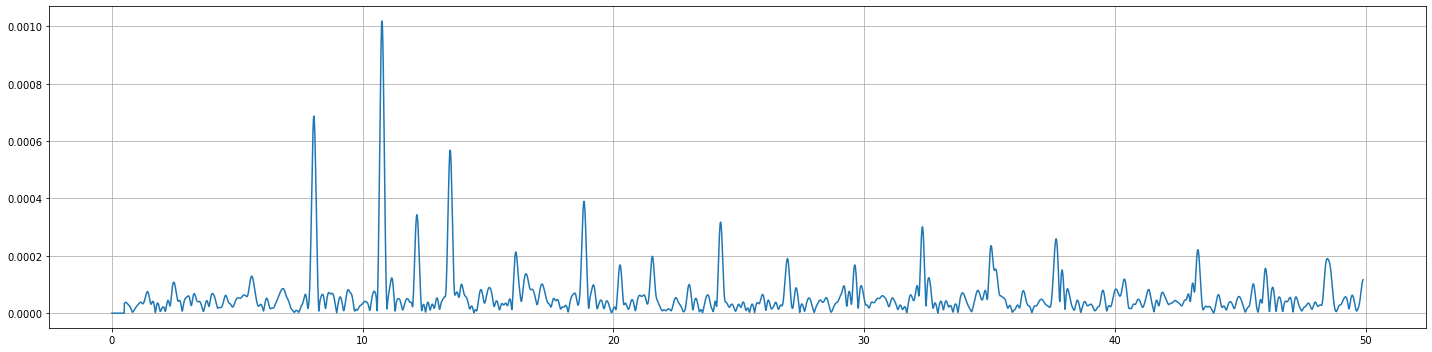

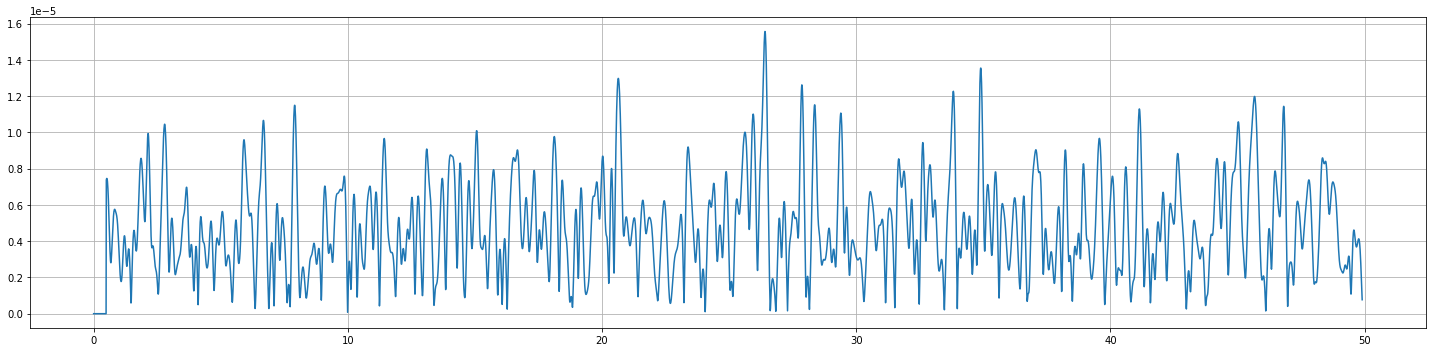

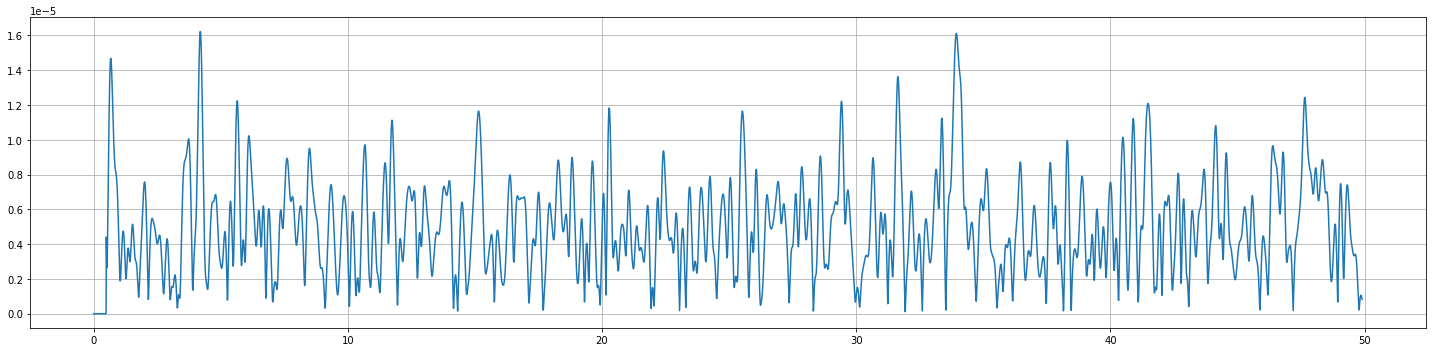

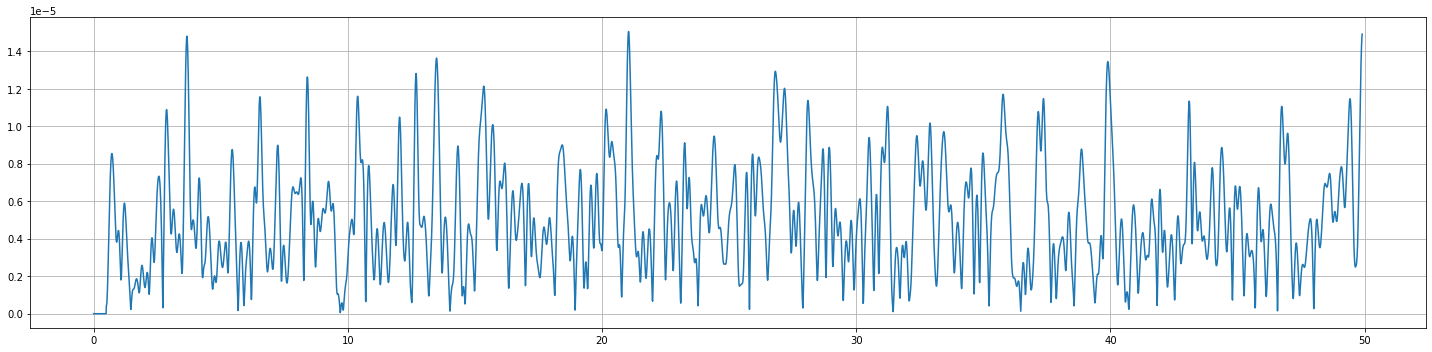

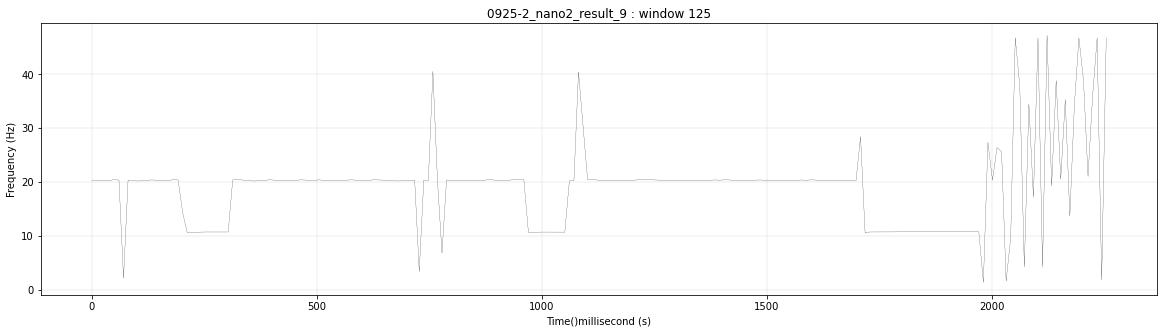

In [30]:
from scipy import sparse
from scipy.sparse.linalg import spsolve
#128 datas  = 23.68sec
data_128 = np.array([])
copy = np.array([])
freq = []
T = 1/(2100000/(float(data_arr[2100000-1][0])-float(data_arr[0][0])))
print(T)
N = len(x)
zeros = np.zeros(10000)
half_c =(np.hanning(1000))
# y = preprocessing.scale(y)
mean = np.mean(data_arry[100:250])
print (mean)

# plt.plot(half_c)
for i in range(0,len(y)):
    
    if data_128.size<1000:
        data_128 = np.append(data_128,y[i])
        copy = np.append(copy,y[i])
    else:
        data_128 = np.delete(data_128,0)
        data_128 = np.append(data_128,y[i])
         
        copy = np.delete(copy,0)
        copy = np.append(copy,y[i]) 
    if len(data_128)==1000 and i!=0 and i%1000==0:
#         plt.figure(figsize=(8, 2))
        data_128 = np.copy(copy)
        
        polynomial_degree=2 #only needed for Modpoly and IModPoly algorithm
        baseObj=BaselineRemoval(data_128)        
        data_128=baseObj.IModPoly(polynomial_degree)

                
#         plt.figure(figsize=(8, 2))
#         plt.xticks(np.arange(0, len(data_128)+1, 500))
# #         x1 = len(data_128)
#         x1 = np.linspace(0,len(data_128),len(data_128))
#         y1 = data_128
#         plt.plot(x1,y1,color = 'k', linewidth=0.1)

        
        data_128 = np.multiply(data_128,half_c)
        data_128 = np.append(data_128,zeros)
#         N = 181
#         x = np.linspace(0.0, N*T, N, endpoint=False)
#         y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
#         yf = fft(data_128)
#         xf = fftfreq(data_128.size, T)[:N//2]
        yf = 1/data_128.size * np.abs(fft(data_128)[0:data_128.size//2])
        xf =(fftfreq(data_128.size,T)[:data_128.size//2])
#         for i in range(1,len(xf)):
#             if xf[i] == 0.5:
#                 print (i)
        yf[0:55] = 0 
        index = np.where(yf == max(yf[:]))
        
#         print (xf)
        
#         n = 250
#         idx = np.argpartition(yf, -n)[-n:]
#         indices = idx[np.argsort((-yf)[idx])]
#         frequency = 0
#         for z in range(0,250):
#             frequency += xf[indices[z]]
#         frequency/250
#         print(index)
#         print(xf[index[0][0]])
#         print(yf[index[0][0]])
        data_128 = np.delete(data_128,np.s_[1000:10000+1000])
        freq.append(xf[index[0][0]])
#         print(xf[index[0][0]])
#         if xf[index[0][0]] > 2:
#             freq.append(xf[index[0][0]])
#         else:
#             freq.append(0)
        if i%10000==0:
            print("jhi")
            plt.figure(figsize=(20, 5))
            plt.plot(xf,yf)
#             plt.plot(xf, 2.0/data_128.size * np.abs(yf[0:data_128.size//2]))
#             plt.plot(data_128)
            plt.grid()
            plt.tight_layout()

# print (freq[0])

plt.figure(figsize = (20,5))
X = np.linspace(0,N*T,len(freq))
Y = np.array(freq)
# plt.xticks(np.arange(0, 2000, 50))
# plt.yticks(np.arange(0, 40, 5))
plt.grid(linewidth= 0.2)
plt.plot(X,Y,c='k',linewidth=0.2)
plt.xlabel('Time()millisecond (s)')
plt.ylabel('Frequency (Hz)')
plt.title("0925-2_nano2_result_9 : window 125")
print (len(freq))
print(freq)
print (len(y))

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
17
12
10
10
10
10
10
10
10
10
10
15
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
15
10
10
10
10
10
10
10
10
15
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
15
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
15
22
22
25
22
25
21
25
26
35
27
27
27
27
34
34
34
34
35
34
35
215
225.4030928571429


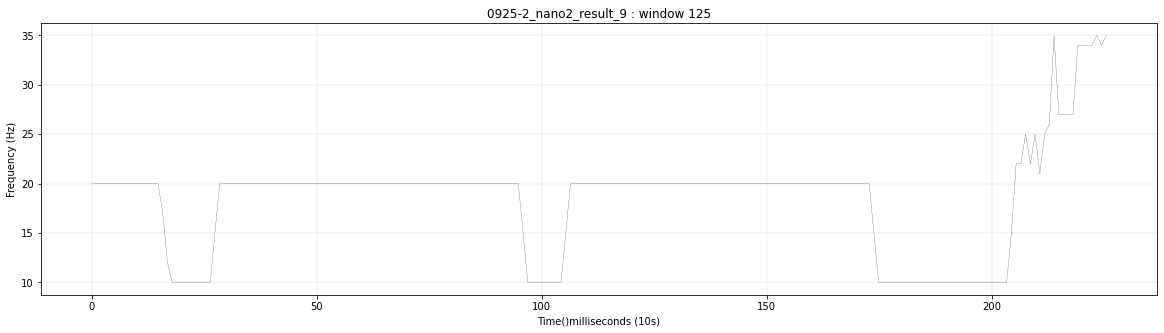

In [33]:
data_10 = np.array([])
copy_10 = np.array([])
freq_10 = []
median = 0
count = 0


for i in range(0,len(freq)):
    
    if data_10.size < 10:
        data_10 = np.append(data_10,int(freq[i]))
    else:
        data_10 = np.delete(data_10,0)
        data_10 = np.append(data_10,int(freq[i]))
         
    if len(data_10)==10:
#         print (data_10)
#         print (np.percentile(data_10, 50))
        freq_10 = np.append(freq_10, int(np.percentile(data_10, 50))) #中位數
        print(int(np.percentile(data_10, 50)))
#         freq_10 = np.append(freq_10, np.mean(data_10))
#         print (freq_10)

#         if 6 < np.percentile(data_10, 50) < 8:
#             count += 1
# #             print (count)
# #             print ('*')
            
# #             if count > 200:
# #                 print ("注水中")
# #                 print ("總時間=", count/0.102)
# #                 print ("剩餘時間=", (count/0.102)-count)

        
#         else:
#             count = 0
# #             print ('count')
# #             print (count)
    
        
plt.figure(figsize = (20,5))
X = np.linspace(0,N*T/10,len(freq_10))
Y = np.array(freq_10)
# plt.xticks(np.arange(0, 2000, 50))ß
# plt.yticks(np.arange(0, 40, 2.5))
plt.grid(linewidth= 0.2)
plt.plot(X,Y,c='k',linewidth=0.2)
plt.xlabel('Time()milliseconds (10s)')
plt.ylabel('Frequency (Hz)')
# plt.title("0811_result_2_z : window 750-30 ")
# plt.title("0918_nano1_result_1  : window 1000-100")
plt.title("0925-2_nano2_result_9 : window 125")
print (len(freq_10))
print (N*T/10)